In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks



In [2]:
def add_data(hmap, data, ts):
    if ts not in hmap:
        hmap[ts] = data
    elif data != hmap[ts]:
        print(f"WHY {ts} is already in: {hmap}")

[9.705, 9.705, 9.705, 9.521, 9.411, 9.411, 9.486, 9.437, 9.437, 9.495, 9.495, 9.455, 9.409, 9.409, 9.431, 9.571, 9.569, 9.569, 9.748, 9.748, 9.748, 9.642, 9.642, 9.642, 9.825, 9.825, 9.825, 9.937, 9.937, 9.937, 10.118, 10.01, 10.01, 9.985, 10.363, 10.363, 10.513, 10.07, 10.07, 10.278, 10.531, 10.531, 10.764, 10.853, 10.977, 10.977, 11.389, 11.451, 11.842, 12.0, 12.0, 11.585, 11.618, 11.618, 11.701, 11.701, 11.701, 11.245, 11.245, 11.245, 11.338, 11.338, 11.338, 10.999, 10.999, 11.177, 10.89, 10.89, 10.938, 10.792, 10.792, 10.432, 10.822, 10.822, 10.879, 10.455, 9.843, 10.019, 10.107, 10.667, 10.667, 9.957, 9.281, 9.281, 10.266, 10.311, 10.311, 9.68, 9.649, 9.649, 9.711, 9.711, 9.711, 9.634, 9.634, 9.634, 9.169, 9.169, 9.169, 8.745, 8.745, 8.383, 8.369, 8.369, 8.581, 7.722, 7.722, 5.113, 4.705, 4.705, 5.174, 4.574, 4.574, 4.136, 4.532, 4.532, 4.532, 4.606, 4.606, 6.498, 6.498, 6.498, 6.214, 8.083, 8.156, 8.156, 9.47, 9.47, 9.344, 7.875, 8.131, 8.131, 9.232, 8.662, 8.662, 8.883, 9.454, 8

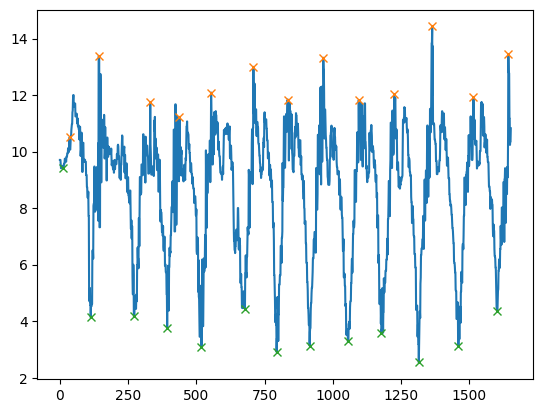

In [3]:
# filename = "/Users/j/8803/8803-project/data2/row/row_udai_set1_reps12_1.log"
filename = "../data2/row/row_udai_set1_reps12_1.csv"

with open(filename, 'r') as file:
    timestamps = []
    accel_x = {}
    accel_y = {}
    accel_z = {}
    gyro_x = {}
    gyro_y = {}
    gyro_z = {}

    for line in file:
        data_line = line.strip()
        if data_line[0].isdigit():
            _, timestamp, accelx, accely, accelz, gyrox,gyroy,gyroz,magx,magy,magz = data_line.split(",")
            timestamp, accelx, accely, accelz, gyrox, gyroy, gyroz = int(timestamp), float(accelx), float(accely), float(accelz), float(gyrox), float(gyroy), float(gyroz)
            idx = None
            if timestamp not in timestamps:
                timestamps.append(timestamp)
                add_data(accel_x, accelx, timestamp)
                add_data(accel_y, accely, timestamp)
                add_data(accel_z, accelz, timestamp)
                add_data(gyro_x, gyrox, timestamp)
                add_data(gyro_y, gyroy, timestamp)
                add_data(gyro_z, gyroz, timestamp)
    
    for ts in timestamps:
        if ts not in accel_x:
            accel_x[ts] = None
        if ts not in accel_y:
            accel_y[ts] = None
        if ts not in accel_z:
            accel_z[ts] = None
        if ts not in gyro_x:
            gyro_x[ts] = None
        if ts not in gyro_y:
            gyro_y[ts] = None
        if ts not in gyro_z:
            gyro_z[ts] = None


    accel_x = dict(sorted(accel_x.items()))
    accel_y = dict(sorted(accel_y.items()))
    accel_z = dict(sorted(accel_z.items()))
    gyro_x = dict(sorted(gyro_x.items()))
    gyro_y = dict(sorted(gyro_y.items()))
    gyro_z = dict(sorted(gyro_z.items()))

    accel_z_array = np.array(list(accel_z.values()))
    #accel_y_array = np.array(list(accel_y.values()))
    peaks, _ = find_peaks(accel_z_array, height=-50, distance=100)
    valleys, _ = find_peaks(-1 * accel_z_array, height=-50, distance=100)


    print(list(accel_z.values()))
    print(peaks)
    print(valleys)

    plt.plot(list(accel_z.values()))

    plt.plot(peaks, accel_z_array[peaks], "x")

    plt.plot(valleys, accel_z_array[valleys], "x")
    plt.show()

    #df = pd.DataFrame({'timestamp': timestamps, 'accel_x': accel_x.values(), 'accel_y': accel_y.values(), 'accel_z': accel_z.values(), 'gyro_x': gyro_x.values(), 'gyro_y': gyro_y.values(), 'gyro_z': gyro_z.values()})
    #df.to_csv('raw_df.csv')
    #cleaned_df = df.interpolate(method="linear")
    #cleaned_df.to_csv('cleaned_df.csv')
    #cleaned_df.plot(x="timestamp")
    #plt.title("Bicep Curls")
    #plt.xlabel("Timestamp")
    #plt.ylabel("IMU Data")
    #plt.show()